In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
for col in df.columns:
  print(col)
  print('Number Of Null Values:',df[col].isnull().sum())
  print(df[col].value_counts())
  print('================================')


PassengerId
Number Of Null Values: 0
PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64
Survived
Number Of Null Values: 0
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
Number Of Null Values: 0
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Number Of Null Values: 0
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth     

In [104]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-172848211.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [105]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [106]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [107]:
df.drop(['Cabin','PassengerId', 'Ticket','Name'], axis=1,inplace=True)

In [108]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [109]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
61,1,1,female,38.0,0,0,80.0,NaN,Miss,1
829,1,1,female,62.0,0,0,80.0,NaN,Mrs,1


In [ ]:
df['Embarked'].fillna('S', inplace=True)

In [111]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev,1
887,1,1,female,19.0,0,0,30.0000,S,Miss,1
888,0,3,female,21.0,1,2,23.4500,S,Miss,4
889,1,1,male,26.0,0,0,30.0000,C,Mr,1


# **Export Data**

In [112]:
df.to_csv('Edited-Titanic-Dataset.csv', index=False)

# **Encoding**

In [113]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

In [114]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Title"] = label.fit_transform(df["Title"])

In [115]:
cols = [c for c in df.columns if c != 'Survived'] + ['Survived']
df = df[cols]

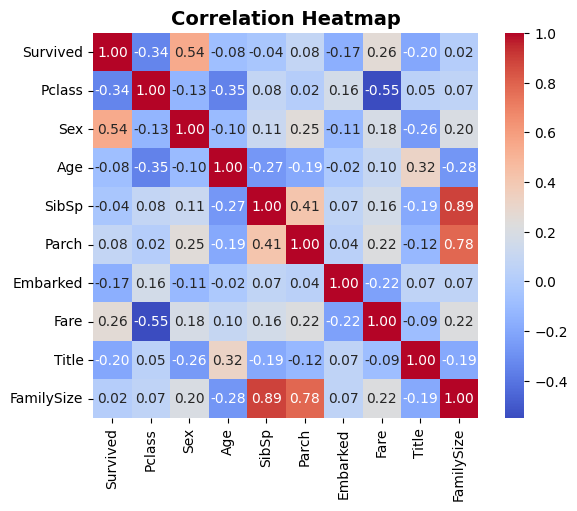

In [116]:
# Correlation Heatmap
plt.figure(figsize=(7,5))
corr = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked','Fare','Title','FamilySize']].corr()
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

In [117]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Survived
0,3,0,22.0,1,0,7.2500,2,12,2,0
1,1,1,38.0,1,0,71.2833,0,13,2,1
2,3,1,26.0,0,0,7.9250,2,9,1,1
3,1,1,35.0,1,0,53.1000,2,13,2,1
4,3,0,35.0,0,0,8.0500,2,12,1,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    int64  
 9   Survived    891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


# **Split Data**

In [119]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Pclass', 'Age', 'Fare', 'FamilySize']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())
display(X_test.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
331,-1.614136,0,1.229075,0,0,-0.078684,2,12,-0.554666
733,-0.400551,0,-0.476087,0,0,-0.377145,2,12,-0.554666
382,0.813034,0,0.205978,0,0,-0.474867,2,12,-0.554666
704,0.813034,0,-0.248732,1,0,-0.476230,2,12,0.040096
813,0.813034,1,-1.764432,4,2,-0.025249,2,9,3.013909


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
709,0.813034,0,-1.953894,1,1,-0.333901,0,8,0.634859
439,-0.400551,0,0.130193,0,0,-0.425284,2,12,-0.554666
840,0.813034,0,-0.703442,0,0,-0.474867,2,12,-0.554666
720,-0.400551,1,-1.764432,0,1,0.007966,2,9,0.040096
39,0.813034,1,-1.158152,1,0,-0.411002,0,9,0.040096


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [123]:
models = list()
models.append(("XGBClassifier" , XGBClassifier()))
models.append(("RandomForestClassifier" , RandomForestClassifier()))
models.append(("KNeighborsClassifier" , KNeighborsClassifier()))
models.append(("LogisticRegression" , LogisticRegression()))
models.append(("GaussianNB" , GaussianNB()))
models.append(("BernoulliNB" , BernoulliNB()))



In [124]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100, '%')

    y_test_pred = model.predict(X_test)
    print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100, '%')

    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("========================================")

XGBClassifier
Training Accuracy: 96.06741573033707 %
Testing Accuracy: 84.91620111731844 %
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       105
           1       0.81      0.84      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179

RandomForestClassifier
Training Accuracy: 98.03370786516854 %
Testing Accuracy: 84.91620111731844 %
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

KNeighborsClassifier
Training Accuracy: 85.1123595505618 %
Testing Accuracy: 81.56424581005587 %
Classifica